In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import f_oneway, ttest_ind, chisquare
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm




# PORTUGAL BIODIVERSITY 

In [8]:
data_pt = pd.read_csv('/Users/Shiva/Documents/DATA_ANALYTICS/Week6/Project/DataSets/port_bio.csv')

In [9]:
data_pt.shape

(8602, 21)

In [10]:
## FILTERING TO KINGDOM AND NUMBER OF OCCURENCES 

data_pt = data_pt[['kingdom','numberOfOccurrences']]

data_pt = data_pt.loc[data_pt['kingdom'] != 'incertae sedis']


In [11]:
data_pt['kingdom'].value_counts()

Plantae      4422
Animalia     2988
Fungi         924
Chromista     207
Bacteria       43
Protozoa       17
Name: kingdom, dtype: int64

In [12]:
### KEY DATA

### NUMBER OF OCCURENCES FOR EACH KINGDOM IN PT

platae_pt = data_pt[data_pt['kingdom'] == 'Plantae']
animalia_pt = data_pt[data_pt['kingdom'] == 'Animalia']

fungi_pt = data_pt[data_pt['kingdom'] == 'Fungi']
chromista_pt = data_pt[data_pt['kingdom'] == 'Chromista']
bacteria_pt = data_pt[data_pt['kingdom'] == 'Bacteria']
protozoa_pt = data_pt[data_pt['kingdom'] == 'Protozoa']

In [13]:
### TOTAL OCCURENCES OF DIFERENT KINGDOMS IN PORTUGAL 

group_pt = data_pt.groupby(data_pt['kingdom']).count()

# ITALY BIODIVERSITY 


In [14]:
data_it= pd.read_csv('/Users/Shiva/Documents/DATA_ANALYTICS/Week6/Project/DataSets/italy_bio.csv')

In [15]:
data_it.head()

,taxonKey,scientificName,acceptedTaxonKey,acceptedScientificName,numberOfOccurrences,taxonRank,taxonomicStatus,kingdom,kingdomKey,phylum,...,class,classKey,order,orderKey,family,familyKey,genus,genusKey,species,speciesKey
0,7247548,Usnea dasypoga (Ach.) Röhl.,7247548.0,Usnea dasypoga (Ach.) Röhl.,1,SPECIES,DOUBTFUL,Fungi,5,Ascomycota,...,Lecanoromycetes,180.0,Lecanorales,1048.0,Parmeliaceae,8305.0,Usnea,2605982.0,Usnea dasypoga,7247548.0
1,3033131,Thalictrum aquilegifolium L.,3033131.0,Thalictrum aquilegifolium L.,5,SPECIES,ACCEPTED,Plantae,6,Tracheophyta,...,Magnoliopsida,220.0,Ranunculales,399.0,Ranunculaceae,2410.0,Thalictrum,3033112.0,Thalictrum aquilegifolium,3033131.0
2,2915121,Galium bernardii Gren.,7779137.0,Galium lucidum subsp. venustum (Jord.) Arcang.,2,SPECIES,SYNONYM,Plantae,6,Tracheophyta,...,Magnoliopsida,220.0,Gentianales,412.0,Rubiaceae,8798.0,Galium,2913027.0,Galium lucidum,2913863.0
3,5498311,Peziza phlebospora (Le Gal) Donadini,5498311.0,Peziza phlebospora (Le Gal) Donadini,1,SPECIES,ACCEPTED,Fungi,5,Ascomycota,...,Pezizomycetes,316.0,Pezizales,1057.0,Pezizaceae,8399.0,Peziza,8766080.0,Peziza phlebospora,5498311.0
4,3595767,Cistus crispus L.,3595767.0,Cistus crispus L.,1,SPECIES,ACCEPTED,Plantae,6,Tracheophyta,...,Magnoliopsida,220.0,Malvales,941.0,Cistaceae,6635.0,Cistus,2874026.0,Cistus crispus,3595767.0


In [16]:
## FILTERING TO KINGDOM AND NUMBER OF OCCURENCES

data_it = data_it[['kingdom','numberOfOccurrences']]

data_it = data_it.loc[data_it['kingdom'] != 'incertae sedis']

In [17]:
data_it['kingdom'].value_counts()

Animalia     7383
Plantae      6676
Fungi         897
Chromista     286
Protozoa      133
Bacteria        4
Name: kingdom, dtype: int64

In [18]:
### NUMBER OF OCCURENCES FOR EACH KINGDOM IN IT

platae_it = data_it[data_it['kingdom'] == 'Plantae']
animalia_it = data_it[data_it['kingdom'] == 'Animalia']
##
fungi_it = data_it[data_it['kingdom'] == 'Fungi']
chromista_it = data_it[data_it['kingdom'] == 'Chromista']
bacteria_it = data_it[data_it['kingdom'] == 'Bacteria']
protozoa_it = data_it[data_it['kingdom'] == 'Protozoa']

In [19]:
### TOTAL OCCURENCES OF DIFERENT KINGDOMS IN ITALY 

group_it = data_it.groupby(data_it['kingdom']).count()

In [20]:
group_it

,numberOfOccurrences
kingdom,
Animalia,7383
Bacteria,4
Chromista,286
Fungi,897
Plantae,6676
Protozoa,133


In [21]:
list(group_it.index)



['Animalia', 'Bacteria', 'Chromista', 'Fungi', 'Plantae', 'Protozoa']

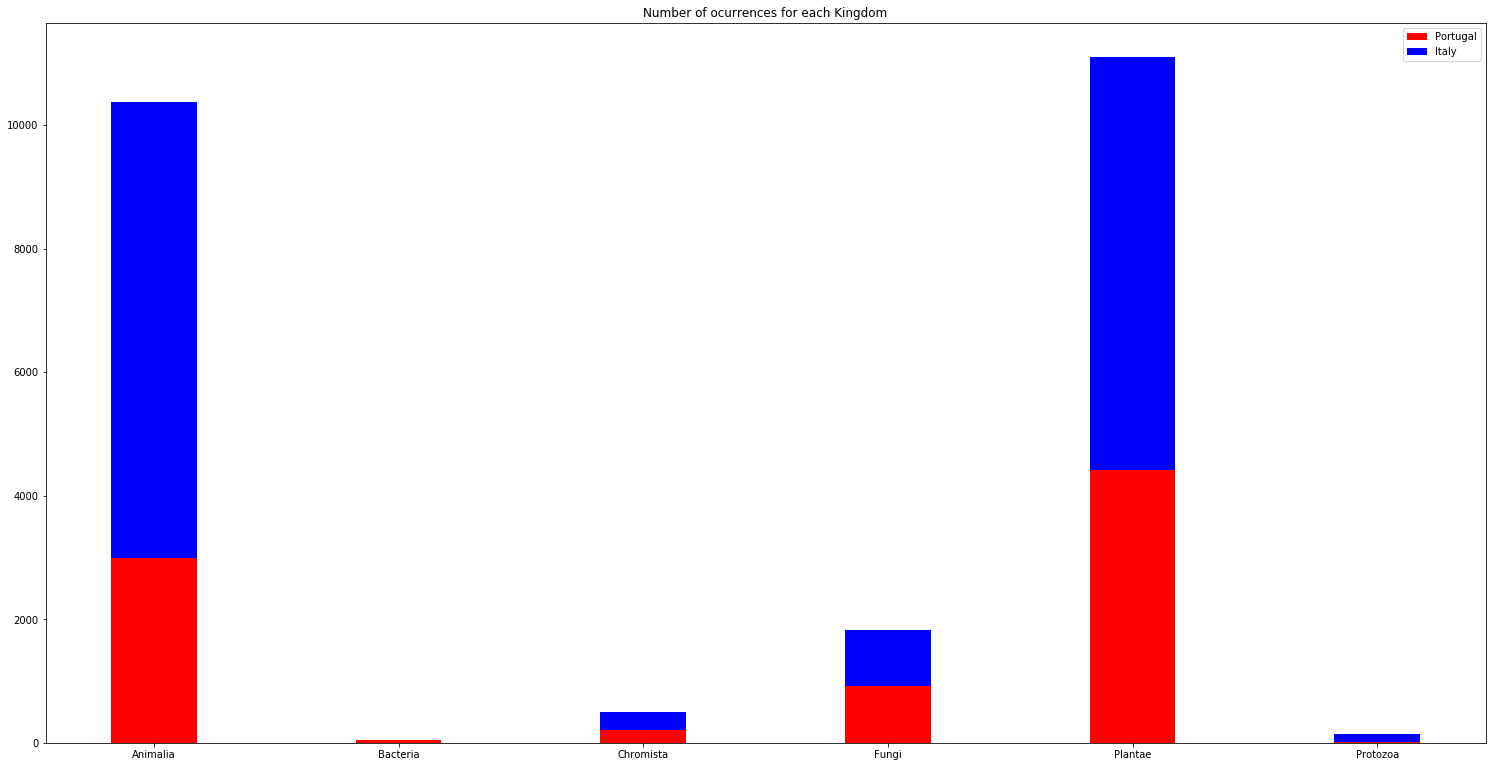

In [51]:
# 1st 

### THERE IS A DIFERENCE BETWEEN THE DIFFERENT KINGDOMS Number of Ocurrences BETWEEN THE TWO COUNTRIES 

ind = list(group_it.index)

fig, axs = plt.subplots(1, 1, figsize=(20, 10))

ax = fig.add_axes([0,0,1,1])
width = 0.35

ax.bar(ind, group_pt['numberOfOccurrences'], width, color='r')
ax.bar(ind, group_it['numberOfOccurrences'], width,bottom=group_pt['numberOfOccurrences'], color='b')
ax.legend(['Portugal','Italy'])
plt.title("Number of ocurrences for each Kingdom")
plt.savefig('Ocurrences_for_each_Kingdom.png')


In [28]:
group_pt['numberOfOccurrences'].index

Index(['Animalia', 'Bacteria', 'Chromista', 'Fungi', 'Plantae', 'Protozoa'], dtype='object', name='kingdom')

<BarContainer object of 6 artists>

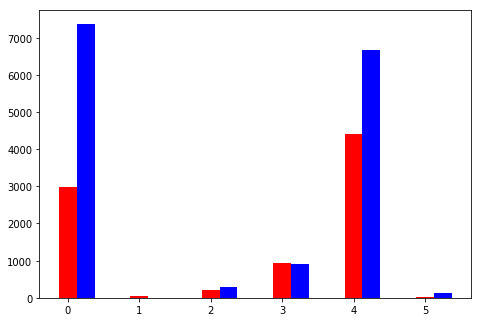

In [31]:

X = np.arange(6)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, group_pt['numberOfOccurrences'], color = 'r', width = 0.25)
ax.bar(X + 0.25, group_it['numberOfOccurrences'], color = 'b', width = 0.25)



# PLANTAE IN ITALY VS PLANTAE IN PORTUGAL ###

In [32]:
## Descriptive statistics 

platae_it.describe()

,numberOfOccurrences
count,6676.000000
mean,5.980527
std,39.135048
min,1.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,2237.000000


In [33]:
"""
It does not fit a Gaussian Model.

"""

'\nIt does not fit a Gaussian Model.\n\n'

In [34]:
####

In [35]:
###outliers from plantae in Italy

q_low = platae_it["numberOfOccurrences"].quantile(0.01)
q_hi  = platae_it["numberOfOccurrences"].quantile(0.99)



In [36]:
#Removing outliers from plantae in Italy  

q_low = platae_it["numberOfOccurrences"].quantile(0.01)
q_hi  = platae_it["numberOfOccurrences"].quantile(0.99)

platae_it_filtered = platae_it[(platae_it["numberOfOccurrences"] < q_hi) & (platae_it["numberOfOccurrences"] > q_low)]


In [37]:
###outliers from plantae in Portugal

q_low = platae_pt["numberOfOccurrences"].quantile(0.01)
q_hi  = platae_pt["numberOfOccurrences"].quantile(0.99)




In [38]:
#Removing outliers from plantae in Portugal  

q_low = platae_pt["numberOfOccurrences"].quantile(0.01)
q_hi  = platae_pt["numberOfOccurrences"].quantile(0.99)

platae_pt_filtered = platae_pt[(platae_pt["numberOfOccurrences"] < q_hi) & (platae_pt["numberOfOccurrences"] > q_low)]



In [39]:
## compare plantae in italy agains plantae in Portugal 

## t-statistics 

## Significance level = 0.05


ttest_ind(platae_pt_filtered['numberOfOccurrences'], platae_it_filtered['numberOfOccurrences'])

Ttest_indResult(statistic=3.239084090448369, pvalue=0.001204381482457467)

In [40]:
"""
WE REJECT THE HYPOTESIS THAT THE TWO DISTRIBUTIONS ARE EQUAL, 
SO THERE IS DIFERENCE BETWEEN THE PLANTAE IN PORTUGAL AND IN ITALLY
WITH A CONFIDENCE LEVEL OF 95%.

"""

'\nWE REJECT THE HYPOTESIS THAT THE TWO DISTRIBUTIONS ARE EQUAL, \nSO THERE IS DIFERENCE BETWEEN THE PLANTAE IN PORTUGAL AND IN ITALLY\nWITH A CONFIDENCE LEVEL OF 95%.\n\n'

In [41]:
# 1 ##### MODEL FIT ##### PLANTAE ITALY WITH GAUSS 

In [42]:
platae_it_filtered_mean = platae_it_filtered.mean()[0]
platae_it_filtered_mean

6.609857612267251

In [43]:
platae_it_filtered_std = platae_it.std()[0]
platae_it_filtered_std

39.13504797884314

In [44]:
platae_it_filtered.shape[0]

4565

In [45]:

mean =platae_it_filtered_mean
std = platae_it_filtered_std

p_normal_it = norm.rvs(loc = mean, scale = std,size = platae_it_filtered.shape[0])
#p_normal_it

#plt.hist(normal1, bins =50)

In [46]:
### Godness of fit for Plantae in Italy 

chisquare(platae_it_filtered['numberOfOccurrences'], f_exp = p_normal_it)



Power_divergenceResult(statistic=-26192.20871208318, pvalue=1.0)

In [ ]:
"""

WE CANT REJECT THEY HAVE THE SAME DISTRIBUTION AS NORMAL ONE 
"""

In [47]:
# 2 ##### MODEL FIT ##### PLANTAE Portugal WITH GAUSS 

platae_pt_filtered_mean = platae_pt_filtered.mean()[0]

platae_pt_filtered_std = platae_pt.std()[0]


mean =platae_pt_filtered_mean
std = platae_pt_filtered_std

#Creating a normal distribution model ---- dont know who to create a geometric distribution ---- to do godness of fit 
# discret distribution 


p_normal_pt = norm.rvs(loc = mean, scale = std,size = platae_pt_filtered.shape[0])


In [221]:
chisquare(platae_pt_filtered['numberOfOccurrences'], f_exp = p_normal_pt)

Power_divergenceResult(statistic=-7519.664272910245, pvalue=1.0)

In [ ]:
"""

WE CANT REJECT THEY HAVE THE SAME DISTRIBUTION AS NORMAL ONE 
"""

In [190]:
## Plot the number of occurences IT and PT 

#### DO BETTER PLOTS HERE 


#platae_it_filtered['numberOfOccurrences'].sort_values().reset_index().drop(columns = 'index').hist()
#platae_pt_filtered['numberOfOccurrences'].sort_values().reset_index().drop(columns = 'index').hist()

# ANIMALIAIN ITALY VS PLANTAE IN PORTUGAL

In [152]:
animalia_it.describe()

,numberOfOccurrences
count,7383.000000
mean,5.049438
std,10.052887
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,198.000000


In [210]:
###outliers for Animallia in Italy

q_low = animalia_it["numberOfOccurrences"].quantile(0.01)
q_hi  = animalia_it["numberOfOccurrences"].quantile(0.99)

#Removing outliers from plantae in Portugal  

q_low = animalia_it["numberOfOccurrences"].quantile(0.01)
q_hi  = animalia_it["numberOfOccurrences"].quantile(0.99)

animalia_it_filtered = animalia_it[(animalia_it["numberOfOccurrences"] < q_hi) & (animalia_it["numberOfOccurrences"] > q_low)]


###outliers for Animallia in Portugal

q_low = animalia_pt["numberOfOccurrences"].quantile(0.01)
q_hi  = animalia_pt["numberOfOccurrences"].quantile(0.99)

#Removing outliers from Animallia in Portugal  

q_low = animalia_pt["numberOfOccurrences"].quantile(0.01)
q_hi  = animalia_pt["numberOfOccurrences"].quantile(0.99)

animalia_pt_filtered = animalia_pt[(animalia_pt["numberOfOccurrences"] < q_hi) & (animalia_pt["numberOfOccurrences"] > q_low)]





In [211]:
## compare animalia in italy agains animalia in Portugal 

## t-statistics 

## Significance level = 0.05

###  pt average higher 
ttest_ind(animalia_pt_filtered['numberOfOccurrences'], animalia_it_filtered['numberOfOccurrences'])

Ttest_indResult(statistic=11.2582562913861, pvalue=3.9058842290867343e-29)

In [212]:
"""
WE REJECT THE HYPOTESIS THAT THE TWO DISTRIBUTIONS ARE EQUAL, 
SO THERE IS DIFERENCE BETWEEN THE ANIMALIA IN PORTUGAL AND IN ITALLY
WITH A CONFIDENCE LEVEL OF 95%.

"""

'\nWE REJECT THE HYPOTESIS THAT THE TWO DISTRIBUTIONS ARE EQUAL, \nSO THERE IS DIFERENCE BETWEEN THE ANIMALIA IN PORTUGAL AND IN ITALLY\nWITH A CONFIDENCE LEVEL OF 95%.\n\n'

In [213]:
##### MODEL FIT ##### ANIMALIA PORTUGAL WITH GAUSS 


animalia_pt_filtered_mean = animalia_pt_filtered.mean()[0]

animalia_pt_filtered_std = animalia_pt_filtered.std()[0]

mean =animalia_pt_filtered_mean
std = animalia_pt_filtered_std

a_normal_it = norm.rvs(loc = mean, scale = std,size = animalia_pt_filtered.shape[0])

chisquare(animalia_pt_filtered['numberOfOccurrences'], f_exp = a_normal_it)


Power_divergenceResult(statistic=-113617.30045560672, pvalue=1.0)

In [ ]:
"""
WE CANT REJECT THEY HAVE THE SAME DISTRIBUTION AS NORMAL ONE.
There is diference in the animal kingdom between the two countries.

"""

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d0a3550>]],
      dtype=object)

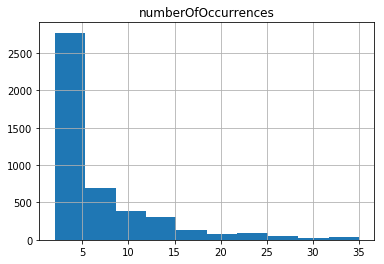

In [218]:
platae_it_filtered['numberOfOccurrences'].sort_values().reset_index().drop(columns = 'index').hist()

In [ ]:
### betweeen 1990 and 2012 
### average number of observation of living beings in portugal and in italy are identical 


In [264]:
platae_it_filtered_sort = platae_it_filtered['numberOfOccurrences'].sort_values().reset_index().drop(columns = 'index')
platae_it_filtered_sort

,numberOfOccurrences
0,2
1,2
2,2
3,2
4,2
...,...
4560,35
4561,35
4562,35
4563,35


In [280]:
observed = platae_it_filtered_sort['numberOfOccurrences'].value_counts()

In [262]:
p = len(platae_it_filtered_sort.loc[platae_it_filtered_sort['numberOfOccurrences'] == 2])/len(x)

In [281]:
geometric = stats.geom(p)


expected = [geometric.pmf(i+1)*len(x) for i in range(len(x['numberOfOccurrences'].value_counts()))]

stats.chisquare(observed, expected)

Power_divergenceResult(statistic=6913.431441073705, pvalue=0.0)